In [1]:
import pandas as pd
import numpy as np
import igraph

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

#### TODO
1. Make 3th.
3. Make 4th.

#### Load data

In [2]:
data_foled = 'data/'
data_file = 'network.csv'
directed = False

In [3]:
df = pd.read_csv(data_foled+data_file, header=0, error_bad_lines=False)
df.columns = ['source_node', 'target_node']

In [4]:
df.head(10)

,source_node,target_node
0,-1,694
1,0,545
2,0,694
3,0,734
4,0,531
5,0,557
6,0,153
7,0,723
8,0,724
9,0,539


In [5]:
tuples = [tuple(x) for x in df.values]
g = igraph.Graph.TupleList(tuples, directed = directed)

### 1. Basic network characteristics

#### Number of nodes $N$

In [6]:
number_nodes = g.vcount()
print("Number of nodes = {0}".format(number_nodes))

Number of nodes = 868


#### Number of links $L$

In [7]:
number_links = g.ecount()
print("Number of links = {0}".format(number_links))

Number of links = 5321


In [8]:
erg = igraph.Graph.Erdos_Renyi(n=number_nodes, m=number_links, directed=directed)

#### Average node degree $<k>$

In [9]:
g_degree = round(np.mean(g.degree()), 2)
erg_degree = round(np.mean(erg.degree()), 2)

print("Average node degree = {0}".format(g_degree))
print("Average node degree (ER) = {0}".format(erg_degree))

Average node degree = 12.26
Average node degree (ER) = 12.26


#### Min. node degree $k_{min}$

In [10]:
min_node_degree_g = min(g.degree())
min_node_degree_erg = min(erg.degree())

print("Min. node degree = {0}".format(min_node_degree_g))
print("Min. node degree (ER) = {0}".format(min_node_degree_erg))

Min. node degree = 1
Min. node degree (ER) = 3


#### Max. node degree $k_{max}$

In [11]:
max_node_degree_g = max(g.degree())
max_node_degree_erg = max(erg.degree())

print("Max. node degree = {0}".format(max_node_degree_g))
print("Max. node degree (ER) = {0}".format(max_node_degree_erg))

Max. node degree = 743
Max. node degree (ER) = 25


In [12]:
np.sort(g.degree())[::-1][:10]

array([743, 686, 382, 380, 281, 272, 264, 206, 175, 169])

#### Average degree of the nearest neighbour $<knn>$

In [13]:
g_knn = round(np.mean(g.knn()[0]), 2)
erg_knn = round(np.mean(erg.knn()[0]), 2)

print("Average degree of the nearest neighbour = {0}".format(g_knn))
print("Average degree of the nearest neighbour (ER) = {0}".format(erg_knn))

Average degree of the nearest neighbour = 374.91
Average degree of the nearest neighbour (ER) = 13.24


#### Assortativity mixing by degrees $r$

In [14]:
g_assortativity = round(g.assortativity_degree(), 3)
erg_assortativity = round(erg.assortativity_degree(), 3)

print("Assortativity mixing by degrees = {0}".format(g_assortativity))
print("Assortativity mixing by degrees (ER) = {0}".format(erg_assortativity))

Assortativity mixing by degrees = -0.414
Assortativity mixing by degrees (ER) = -0.007


In [15]:
res = []
for i in range(0,2000):
    erg = igraph.Graph.Erdos_Renyi(n=number_nodes, m=number_links, directed=directed)
    res.append(round(erg.assortativity_degree(), 3))

In [16]:
np.mean(res)

-0.0017050000000000001

In [17]:
max(res)

0.052

In [18]:
min(np.abs(res))

0.0

#### Size of the largest connected component GCC: number of nodes and % of nodes

In [19]:
g_lcc_nodes = g.clusters(mode='weak').giant().vcount()
erg_lcc_nodes = erg.clusters(mode='weak').giant().vcount()

print("Number of nodes in the LCC = {0}".format(g_lcc_nodes))
print("Number of nodes in the LCC (ER) = {0}".format(erg_lcc_nodes))

Number of nodes in the LCC = 868
Number of nodes in the LCC (ER) = 868


In [20]:
g_lcc_nodes = g.clusters(mode='weak').giant().vcount()
erg_lcc_nodes = erg.clusters(mode='weak').giant().vcount()

print("% of nodes in the LCC = {0}".format(g.vcount()/g_lcc_nodes))
print("% of nodes in the LCC (ER) = {0}".format(erg.vcount()/erg_lcc_nodes))

% of nodes in the LCC = 1.0
% of nodes in the LCC (ER) = 1.0


#### Average shortest path length $<l>$

In [21]:
def avg_sp(paths):
    result = []
    
    for p in paths:
        result.append(np.mean(p))
    return np.mean(result)

In [22]:
g_sp = g.shortest_paths()
erg_sp = erg.shortest_paths()

In [23]:
g_avg_sp = round(avg_sp(g_sp),3)
erg_avg_sp = round(avg_sp(erg_sp),3)

print("Average shortest path length = {0}".format(g_avg_sp))
print("Average shortest path length (ER) = {0}".format(erg_avg_sp))

Average shortest path length = 2.059
Average shortest path length (ER) = 2.953


#### Diameter of the network (max value of shortest path length) $l_{max}$

In [24]:
def max_sp(paths):
    result = []
    
    for p in paths:
        result.append(max(p))
    return max(result)

In [25]:
g_max_sp = round(max_sp(g_sp),3)
erg_max_sp = round(max_sp(erg_sp),3)

print("Average shortest path length = {0}".format(g_max_sp))
print("Average shortest path length (ER) = {0}".format(erg_max_sp))

Average shortest path length = 4
Average shortest path length (ER) = 5


In [26]:
erg.diameter()

5

#### Global transitivity $C$

In [27]:
g_transitivity = round(g.transitivity_undirected(),3)
erg_transitivity = round(erg.transitivity_undirected(),3)

print("Global transitivity = {0}".format(g_transitivity))
print("Global transitivity (ER) = {0}".format(erg_transitivity))

Global transitivity = 0.07
Global transitivity (ER) = 0.014


#### Average clustering coefficient $<c>$

In [28]:
g_avg_transitivity = round(g.transitivity_avglocal_undirected(),3)
erg_avg_transitivity = round(erg.transitivity_avglocal_undirected(),3)

print("Average clustering coefficient = {0}".format(g_avg_transitivity))
print("Average clustering coefficient (ER) = {0}".format(erg_avg_transitivity))

Average clustering coefficient = 0.894
Average clustering coefficient (ER) = 0.014


#### Average betweenness centrality $<b>$

In [29]:
g_betweenness = round(np.mean(g.edge_betweenness()),3)
erg_betweenness = round(np.mean(erg.edge_betweenness()),3)

print("Average betweenness centrality = {0}".format(g_betweenness))
print("Average betweenness centrality (ER) = {0}".format(erg_betweenness))

Average betweenness centrality = 145.792
Average betweenness centrality (ER) = 209.093


<br/><br/>
### 2. Degree distribution

In [30]:
# g_dd = g.degree_distribution().__plot__
# erg_dd = erg.degree_distribution()

In [31]:
g_d = g.degree()
g_d_unique, g_d_counts = np.unique(g_d, return_counts=True)

erg_d = erg.degree()
erg_d_unique, erg_d_counts = np.unique(erg_d, return_counts=True)

In [32]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

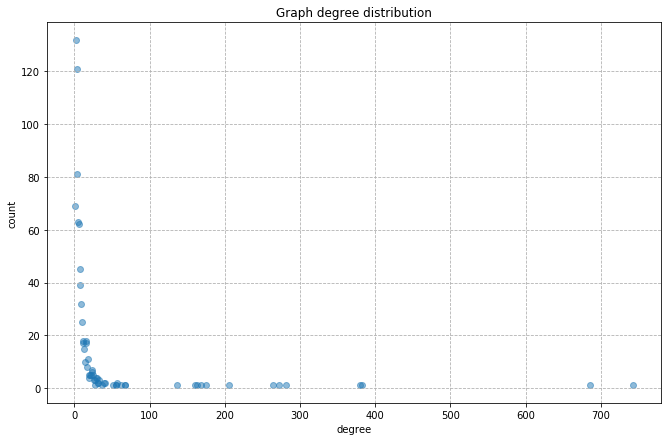

In [33]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5)

plt.title('Graph degree distribution')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.grid(linestyle='dashed')
plt.show() # show the plot

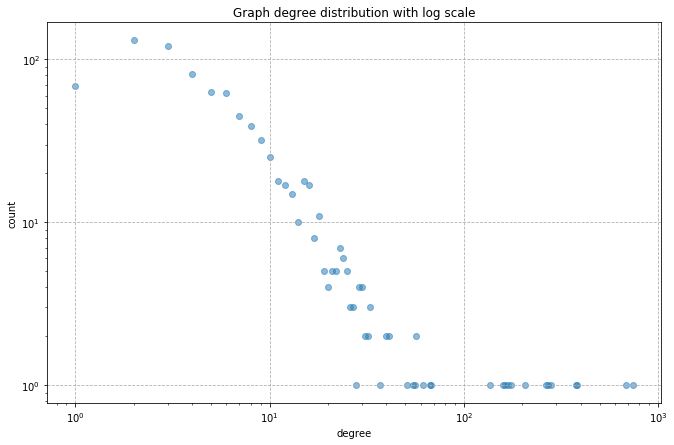

In [34]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5)

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

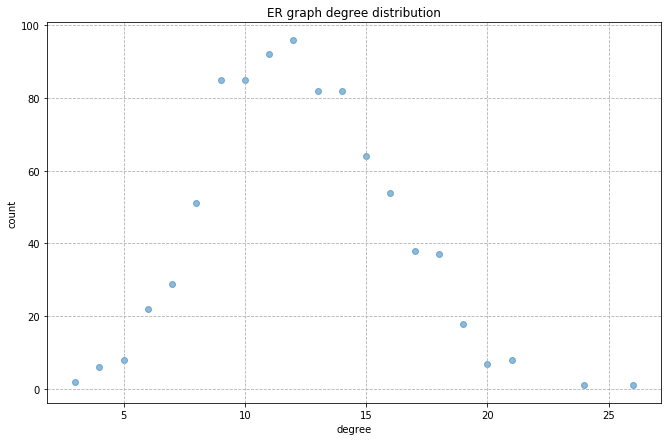

In [35]:
figure(figsize=(11,7))

plt.scatter(x = erg_d_unique,
            y = erg_d_counts, 
            alpha=0.5)

plt.title('ER graph degree distribution')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.grid(linestyle='dashed')
plt.show() # show the plot

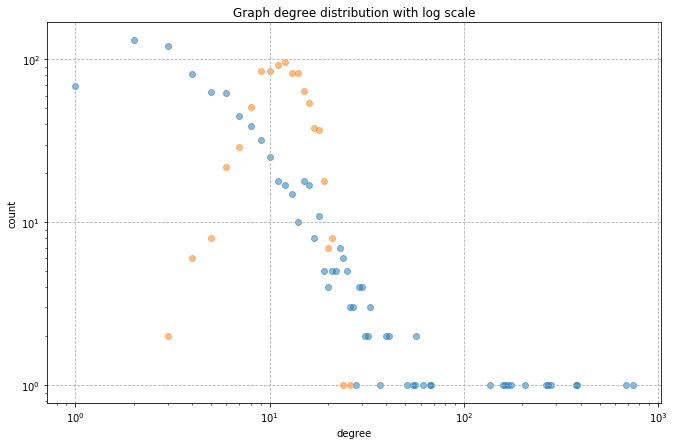

In [36]:
figure(figsize=(11,7))

plt.scatter(x = g_d_unique,
            y = g_d_counts, 
            alpha=0.5)

plt.scatter(x = erg_d_unique,
            y = erg_d_counts, 
            alpha=0.5)

plt.title('Graph degree distribution in log scale')
plt.xlabel('degree')
plt.ylabel('count')

plt.grid(True)

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='dashed')
plt.show() # show the plot

### 3. Correlations

#### Node clustering coefficient $c$ vs node degree $k: c(k)$

#### Average shortest path length $l$ from node to other nodes vs node degrees $k$

### 4. Community structure of the network using Louvain algorithm

#### Modularity $Q$ of the optimal partition

#### The number $n_c$ of clusters in optimal partition

#### Distribution of cluster sizes of the optimal partition $P(n_c)$